## Cardiovascular Disease Risk Prediction EDA

- Objective:

The aim of this Exploratory Data Analysis (EDA) is to delve deep into the "Cardiovascular Diseases Risk Prediction Dataset" sourced from Kaggle and further extracted from a significant study by the Behavioral Risk Factor Surveillance System (BRFSS) in 2021 from World Health Organization (WHO). With a repository of 308,854 individual cases, this dataset offers insights into diverse factors, ranging from general health metrics, lifestyle habits, to demographics.

Our primary goal is to discern patterns and relationships amongst these variables to ascertain their impact on cardiovascular disease (CVD) risk. In so doing, we aim to furnish actionable insights that might aid in the early identification of high-risk individuals, thereby facilitating timely interventions. 

By unlocking these insights, we anticipate not only enhancing individual cardiovascular health management but also lightening the load on healthcare systems. Furthermore, drawing from the foundational work by the WHO that underscores the potential of machine learning in CVD prediction, this EDA will also set the stage for potential advanced modeling and prediction tasks.

In [1]:
# Import libraries needed 

import warnings 
warnings.filterwarnings('ignore')

# For data manipulation & analysis

import pandas as pd 

# For some arithmetic and matrix operations

import numpy as np 

# For data visualization

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import dataset:

df = pd.read_csv(r"C:\Users\Aya K\Desktop\CVD_cleaned.csv")

# Display first few rows of dataset:

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
# Get an overview of the data types, null values, number of observations, etc. 

df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

(308854, 19)

## - Insights:

- There are 308854 total number of observations/cases and 19 different variables/features.
- There are no null values. 
- There 12 categorical values (object) & 7 numerical values (float64).

In [4]:
# Double check if there are any null (NA) values:

Null_Values = df.isnull().sum()

if Null_Values.any():
    print("Null values exist in the DataFrame.")
else:
    print("No null values exist in the DataFrame.")

No null values exist in the DataFrame.


In [5]:
# Double check data types

df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [6]:
# Iterate over columns and print unique values:

for column in df.columns:
    unique_values = df[column].unique()
    print("The unique values in column",column,"are:",unique_values)

The unique values in column General_Health are: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
The unique values in column Checkup are: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
The unique values in column Exercise are: ['No' 'Yes']
The unique values in column Heart_Disease are: ['No' 'Yes']
The unique values in column Skin_Cancer are: ['No' 'Yes']
The unique values in column Other_Cancer are: ['No' 'Yes']
The unique values in column Depression are: ['No' 'Yes']
The unique values in column Diabetes are: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
The unique values in column Arthritis are: ['Yes' 'No']
The unique values in column Sex are: ['Female' 'Male']
The unique values in column Age_Category are: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
The unique values in column Height_(cm) are: [150. 165. 163. 1

[Text(0.5, 1.0, 'Distribution of Heart Disease')]

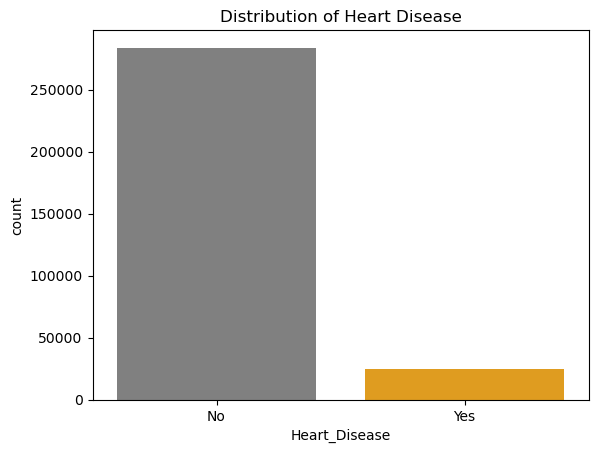

In [7]:
# Univariate Analysis:
# Target variable analysis (Heart Disease):

color_map = {
    "Yes": "orange",
    "No": "grey"
}

sns.countplot(x='Heart_Disease', palette=color_map, data=df).set(title='Distribution of Heart Disease')

## - Insights:

- There is a significantly higher number of patients with no heart disease or myocardial infarction.

In [8]:
# Summary Statistics: 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_(cm),308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_(kg),308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,5.096366,8.199763,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308854.0,29.835200,24.875735,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308854.0,15.110441,14.926238,0.00,4.00,12.00,20.00,128.00
FriedPotato_Consumption,308854.0,6.296616,8.582954,0.00,2.00,4.00,8.00,128.00


## - Insights:

- Height (cm):

Average height is approximately 170.51 cm.

The height ranges from 91.00 cm to 241.00 cm.

Half of the individuals have a height below 170.00 cm (median), and half are taller.

Most people (75% of them) are below 178.00 cm in height.

- Weight (kg):

The average weight is about 83.89 kg.

Weight varies considerably, from a minimum of 24.95 kg to a maximum of 293.02 kg.

The median weight is 81.65 kg.

- BMI:

Average BMI is around 28.63, which is in the overweight range.

BMI spans from 12.02 (which is underweight) to a very high value of 99.33.

The median BMI is 27.44.

## - According to the questions in the BRFSS Questionnaire, the variables below concering dietary choices refer to monthly intake. However, the  quantity entered can be in times per day, week, or month. Since that is not specified in each entry, it's important to keep that in  mind when interpreting the numbers.

- Alcohol_Consumption:

On average, individuals consume about 5.09 of alcohol.

Alcohol consumption has a broad range, from 0 to 30.

Half of the individuals consume 1 or less, suggesting a significant portion doesn't drink much or at all.

- Fruit_Consumption:

Average fruit consumption is about 29.84.

Consumption ranges from 0 to 120.

The median consumption is 30, indicating that half of the individuals consume 30 or more.

- Green_Vegetables_Consumption:

On average, individuals consume around 15.11 of green vegetables.

Consumption varies widely, from 0 to 128.

The median is 12, which is a bit lower than the average, indicating a slightly skewed distribution.

- FriedPotato_Consumption:

Average consumption is approximately 6.30.

Ranges from 0 to 128.

Half of the individuals consume 4 or less.

## Conclusions:

- Most individuals in the dataset are overweight based on the average BMI value.

- There is a wide range in values for weight, BMI, and the consumption metrics, suggesting a diverse group of individuals or potential outliers.

- A substantial portion of the dataset doesn't consume much alcohol.

- Most individuals consume a similar amount of fruits, as indicated by the close mean and median values.

- Green vegetable and fried potato consumption are less uniform, with wider variances.

To fully comprehend these stats, knowing the units of consumption (e.g., grams, servings) and the context (e.g., daily, weekly consumption) would provide clearer insights. Additionally, examining potential outliers, especially for variables like BMI and consumption metrics, would be advisable.

In [9]:
df.describe(include=object)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


## - Insights:
- Most patients describe their health as "Very Good."
- Most patients had a checkup within the past year.
- Most patients participate in any physical activities or exercises such as running.
- Most patients do not have heart disease, skin cancer, other type of cancer, depression, diabetes, arthritis, or even smoking history.
- Most patients are female.
- Most patients are in the 65-69 age category.

In [10]:
corr = df.corr()

corr

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


## - Insights:

- High Correlation between: Weight & BMI
- Somewhat high correlation between: Weight & Height

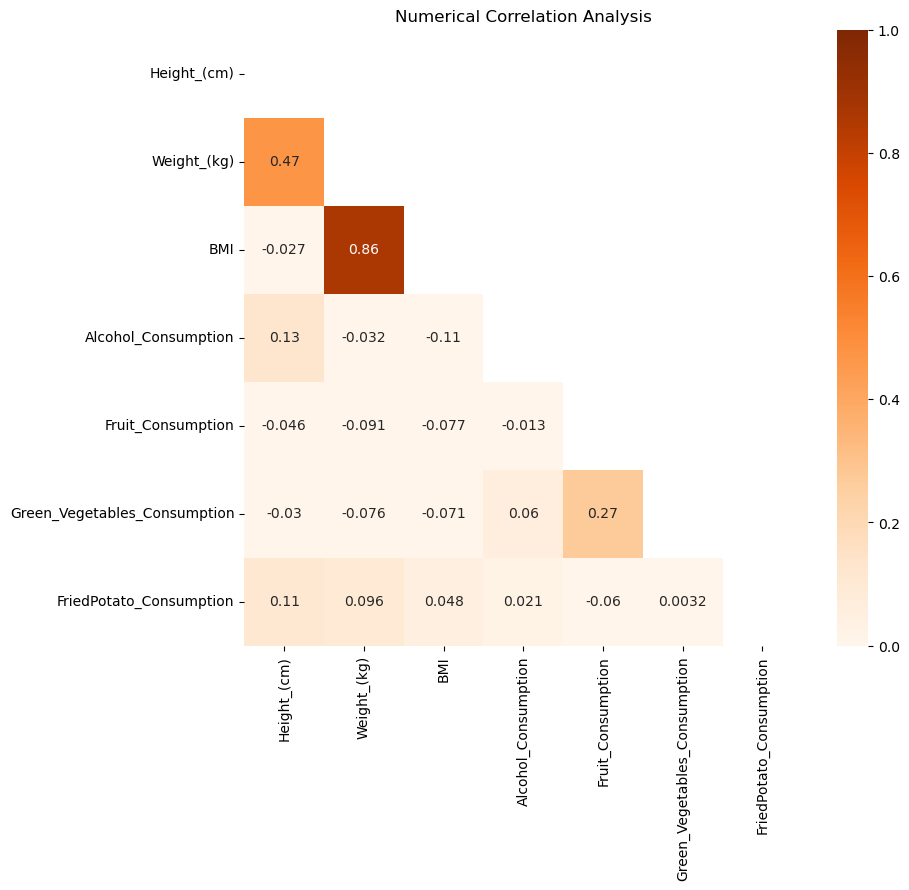

In [11]:
# Numerical Values Heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9, 8))
sns.heatmap(corr, mask=mask, cmap = 'Oranges', vmin=0, vmax=1, annot=True).set(title='Numerical Correlation Analysis')

plt.show()

## - Insights: 

- Height and Weight: A strong positive correlation of 0.47 indicates that as height increases, weight generally also increases.
- Weight and BMI: There's a very strong positive correlation of 0.86, suggesting that higher weights are associated with higher BMIs.
## - This is expected as BMI is a measure that takes weight & height into consideration.

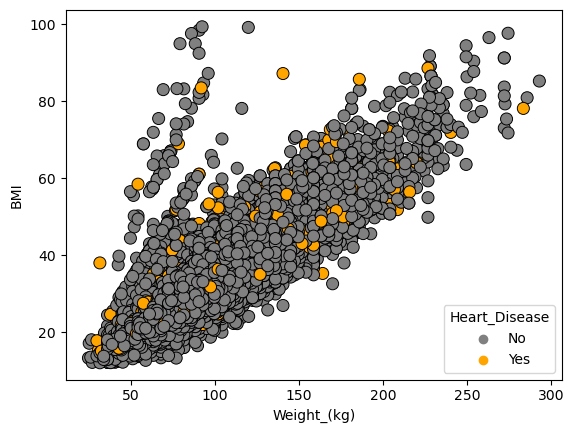

In [12]:
# Create scatter plot between Weight & BMI 

sns.scatterplot(data=df, x='Weight_(kg)', y='BMI', hue='Heart_Disease', palette=color_map,
                s=75,      
                alpha=1,   
                edgecolor="black")
plt.show()

## - Insights: 
- As weight increases, BMI also increases. This is expected as BMI is a measure that takes weight into consideration, along with height.
- The majority of data points cluster between weights of 50 kg to 200 kg and BMIs of 20 to 80.
- Higher BMI might be correlated with an increased risk of heart disease. However, it's important to note that there are still many individuals with higher BMIs who do not have heart disease. Also, this doesn't imply causation. Other factors not represented in this graph might be at play.
- There are a few individuals with extremely high weights (close to 300-350 kg) but with BMIs that are not proportionally high. This could be due to factors like height or errors in data recording.

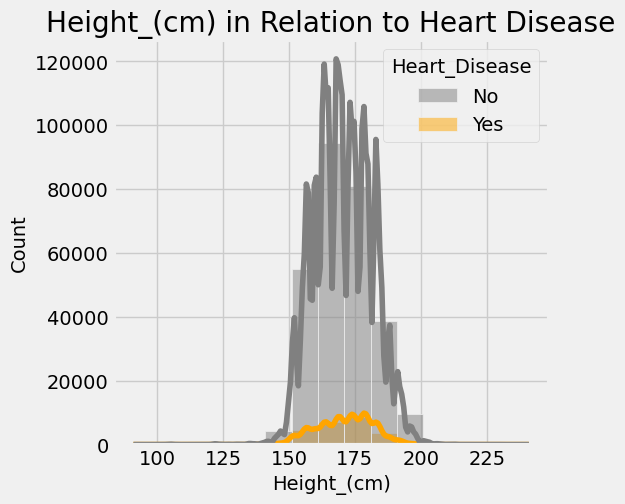

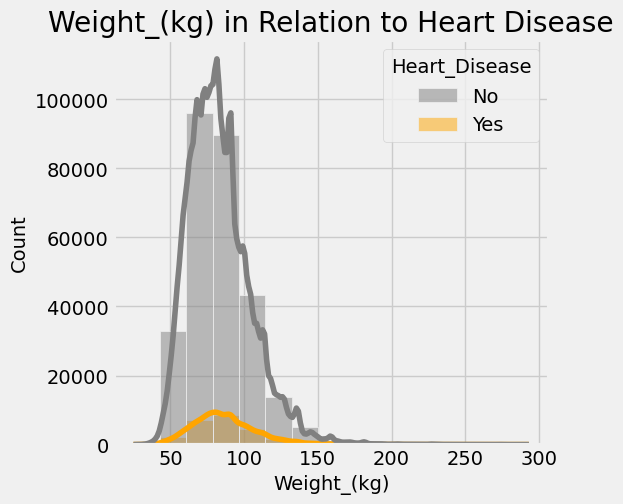

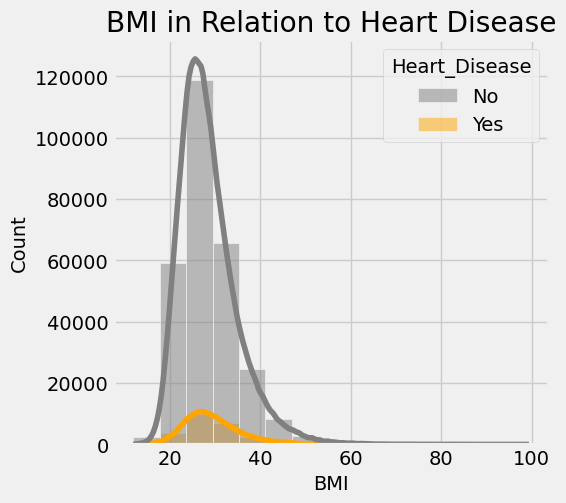

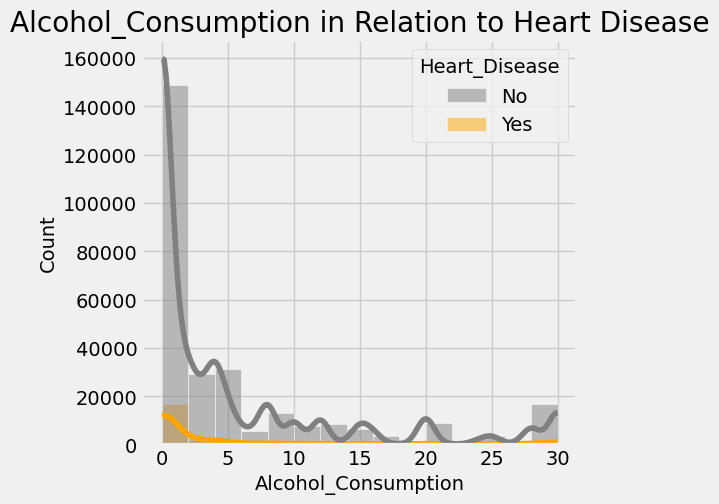

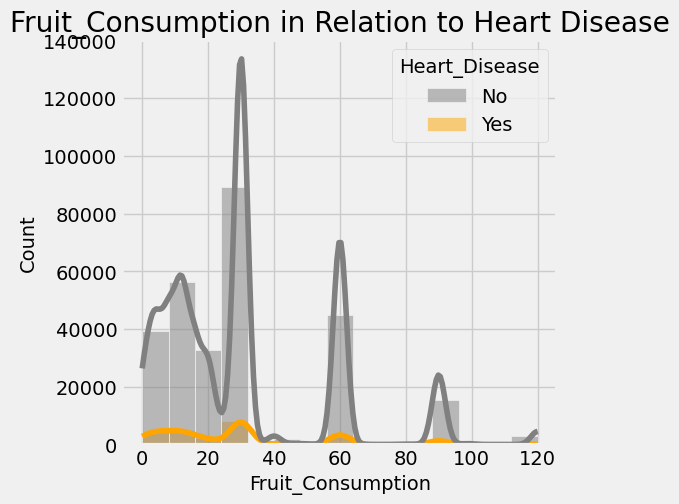

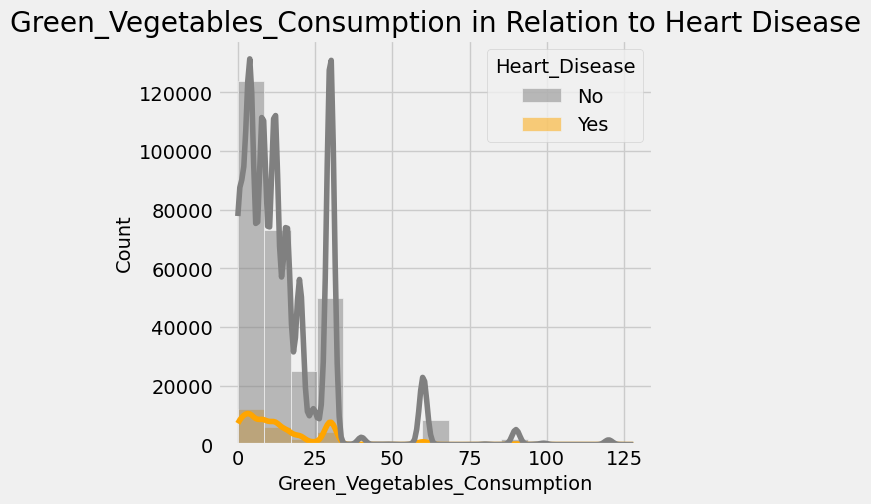

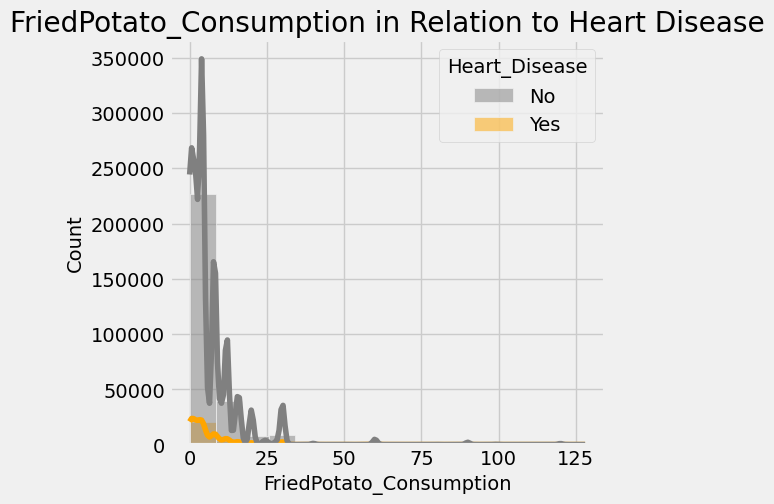

In [13]:
# Check the distribution of numerical variables

plt.style.use("fivethirtyeight")
numerical_variables = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=variable, hue='Heart_Disease', palette=color_map, kde=True, bins=15).set(title=variable + ' in Relation to Heart Disease')

## - Insights: 

- Height: The height for majority of patients is around 150 to 180 cm. Those with higher heart disease prevalence tend to fall within the range of 170-180 cm. The likelihood of heart disease doesn't seem to vary significantly with height.


- Weight: Overall, most patients weight between 50-100 kg. To be specific, however, most patients who report having heart disease weigh between approximately 75 and 100 kg. There doesn't seem to be a specific weight range where the risk of heart disease substantially deviates from the overall trend.

- BMI: Most patients' BMI falls between 20-40. BMI for those reporting with higher heart disease prevalence tends to be between 20-35. There is a minority with <20 BMI (underweight) and there a significant number of patients that are obese with BMI >30. There clearly are outliers as well. While the majority of individuals have a BMI between 20 and 40, the risk of heart disease does not show significant variation across the BMI range.

## - According to the questions in the BRFSS Questionnaire, the variables below concerning dietary choices refer to monthly intake. However, the  quantity entered can be in times per day, week, or month. 

- Alcohol Consumption: This variable is heavily right-skewed. Most patients have low alcohol consumption, but there are a few patients with high consumption of alcohol that falls between 0-2.5 or about 0-3 times. While most people consume little to no alcohol, there is a subtle indication that very high alcohol consumption might be associated with a slightly increased risk of heart disease.

- Fruit Consumption: A lot of patients consume fruits regularly including those with higher heart disease prevalence, but a good number consume them less frequently. The highest consumption appears to be from 25-30 which corresponds to the avg. insight I interpreted earlier. There doesn't seem to be a direct correlation between the amount of fruit consumed and the occurrence of heart disease, as the distribution of heart disease remains proportionally similar across the different consumption peaks.

- Green Vegetable Consumption: There clearly are many outliers in this variable. It appears to be somewhat right-skewed, with most patients consuming green vegetables moderately appearing to be from 0-15 times. The same majority appear to have higher heart disease prevalence. While there are distinct patterns in green vegetable consumption, the graph doesn't highlight a direct correlation between the amount of green vegetables consumed and heart disease risk.

- Fried Potato Consumption: This variable is right-skewed. Many patients consume fried potatoes less frequently, while a few consume them more often (0-15 times). There clearly are outliers as well. While most individuals consume minimal to no fried potatoes, the graph does not provide a clear indication that higher fried potato consumption directly correlates with increased heart disease risk.

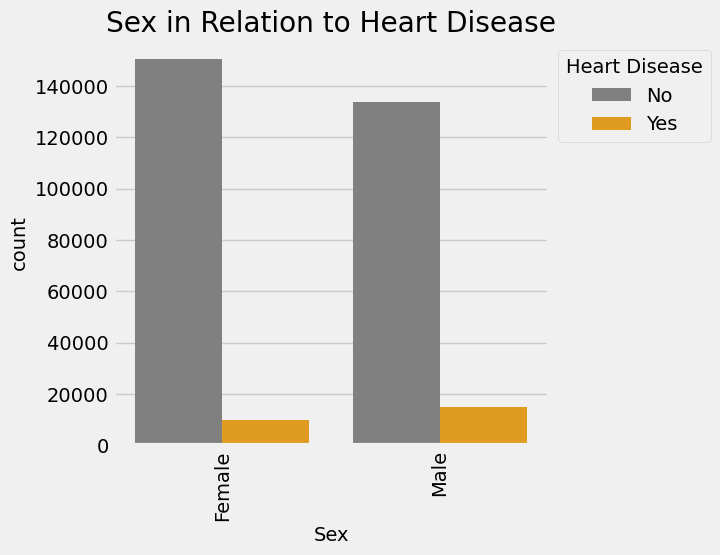

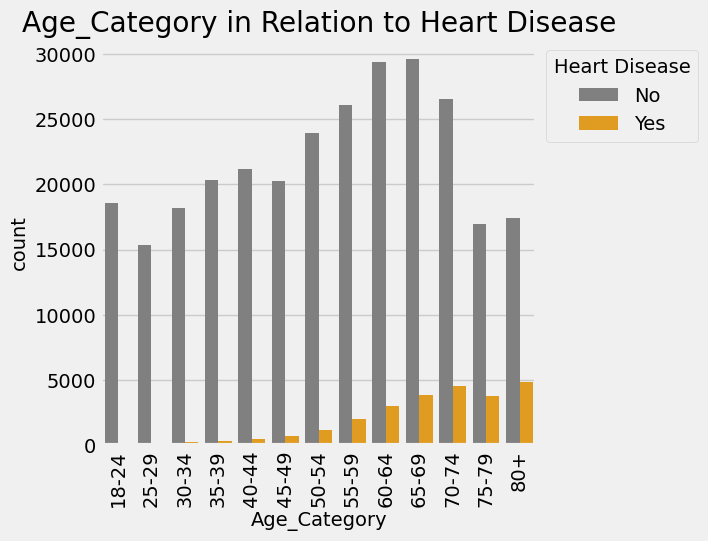

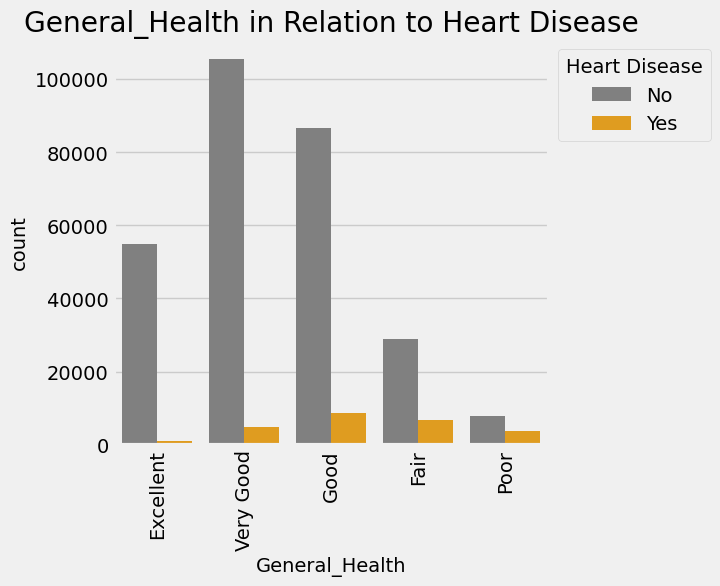

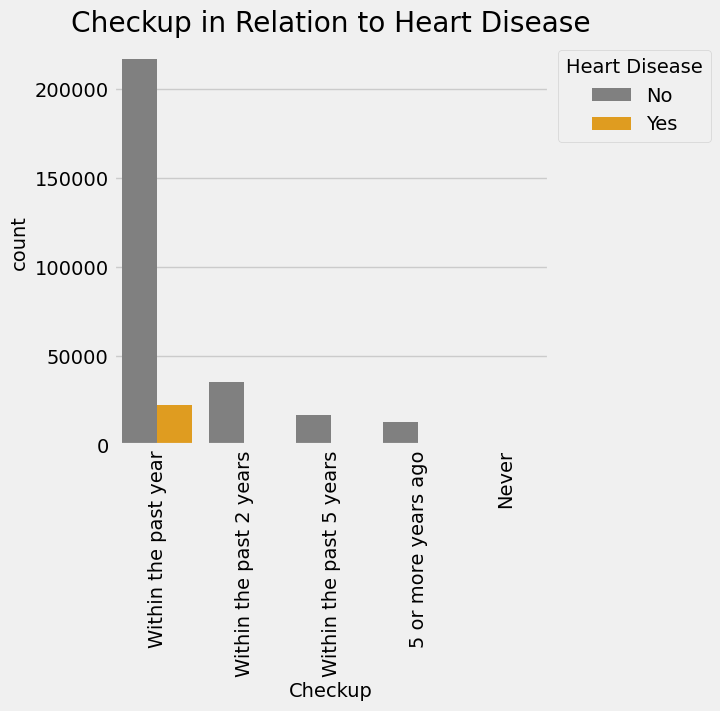

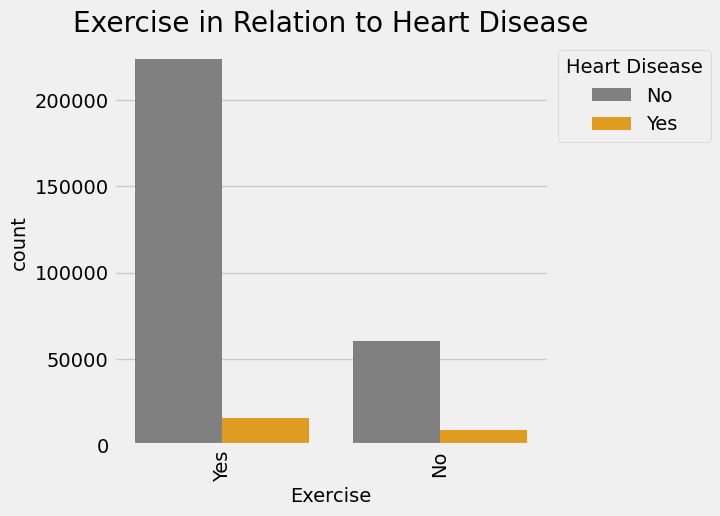

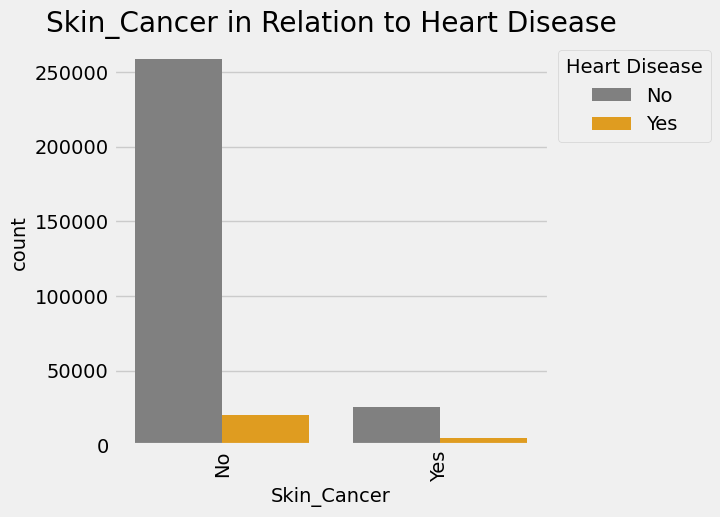

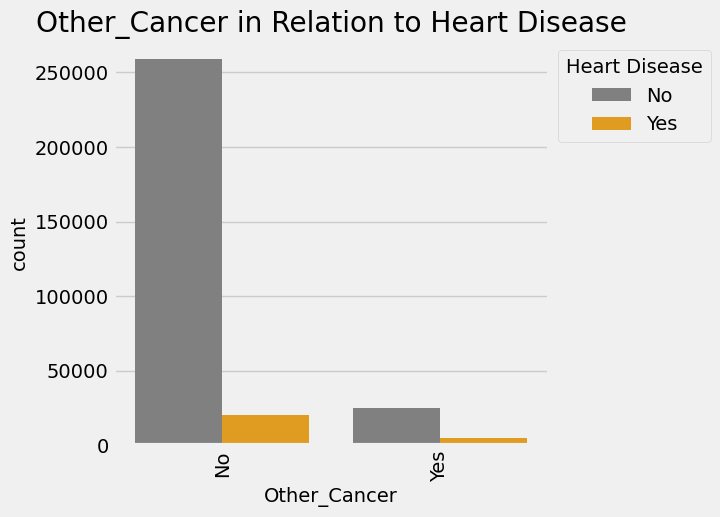

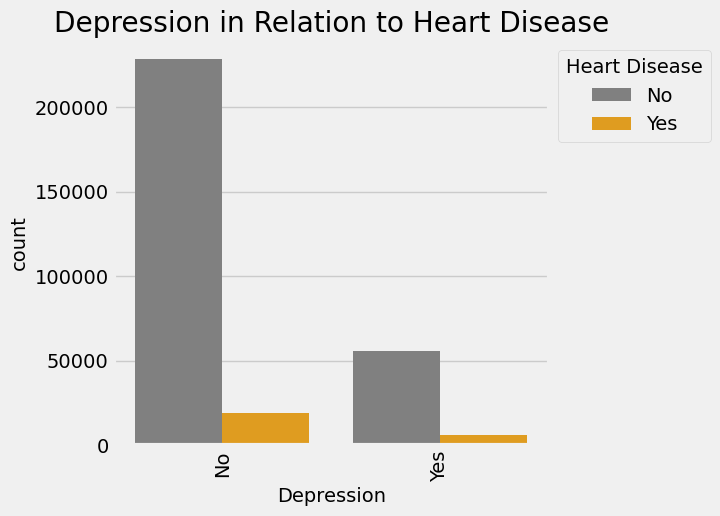

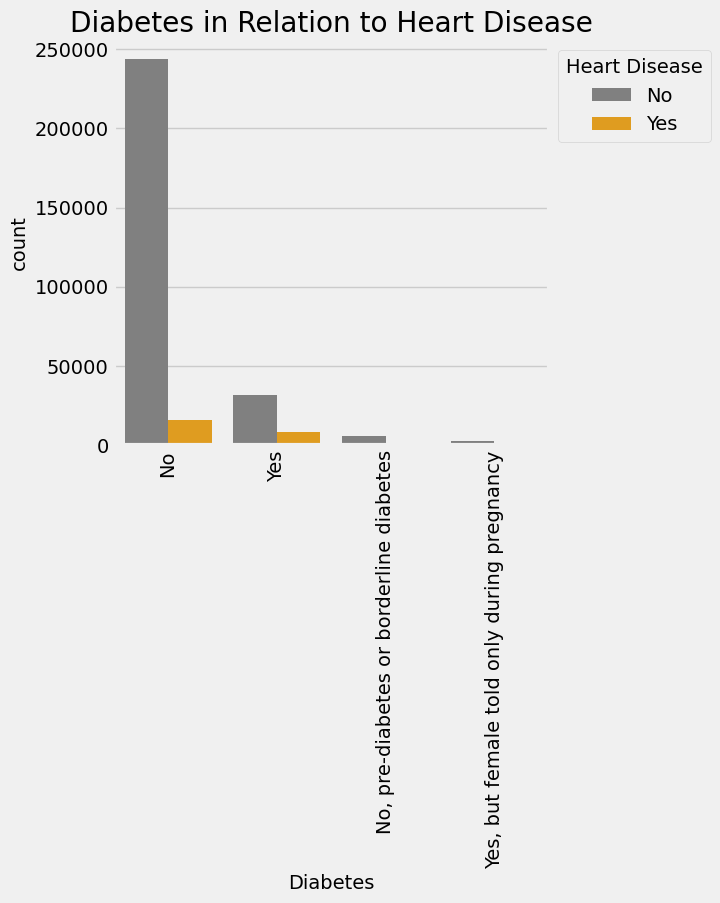

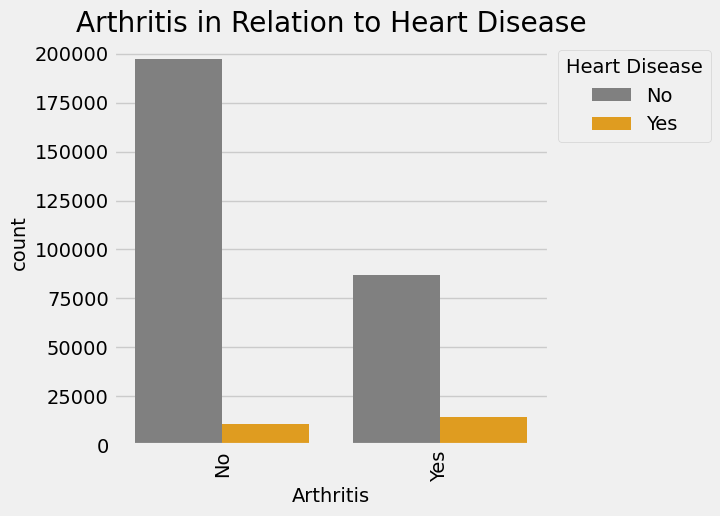

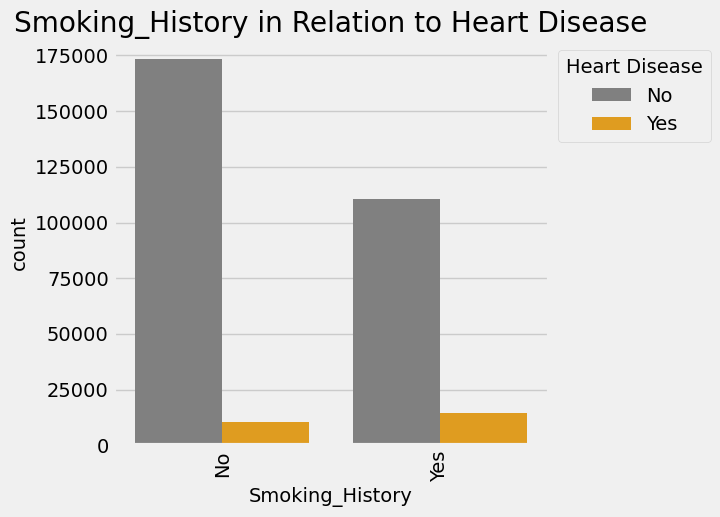

In [14]:
# Check the distribution of categorical variables and show how they relate to Heart disease, the target variable

categorical_variables = ['Sex', 'Age_Category', 'General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Smoking_History']

custom_order = {
    'Age_Category': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'], 
    'General_Health': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'Checkup':['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']
}

for variable in categorical_variables:
    plt.figure(figsize=(5, 5))
    if variable in custom_order:
        order = custom_order[variable]
    else:
        order = df[variable].value_counts().index
    sns.countplot(data=df, x=variable, hue='Heart_Disease', palette=color_map, order=order)
    plt.title(variable.replace('_', ' ')) 
    plt.title(variable + ' in Relation to Heart Disease')
    plt.legend(title='Heart Disease', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)

## - Insights: 
- Sex/Gender: Both females and males predominantly do not have heart disease, but the proportion of males with heart disease appears slightly higher than that of females.
- Age Category: Heart disease is less prevalent in younger age groups and appears to increase with age, with the oldest age categories showing the highest number of cases.
- General Health: Most patients describe their health as "Very Good" or "Good". Those with higher heart disease prevalence tend to describe their health as "Good." As the perceived general health goes from "Excellent" to "Poor", there seems to be an increasing proportion of individuals with heart disease. However, it's interesting to note that even among those who rate their health as "Excellent" or "Very Good", there's still a presence of heart disease, highlighting that subjective health perceptions might not always align with objective health conditions.
- Checkup: Most patients had a checkup within the past year, including those with higher heart disease prevalence. The majority of individuals across all categories do not have heart disease. However, the highest count of checkups is seen in the "within the past year" category, which suggests that regular medical consultations might play a role in early detection or management of potential health issues. Still, it's essential to note that heart disease is present even among those who have regular checkups, emphasizing the importance of comprehensive health assessments and not just frequency.
- Exercise: Most patients report doing some kind of physical activity or exercising including those with higher heart disease prevalence. Exercising seems to be associated with a lower prevalence of heart disease. However, it's important to note that even among those who exercise, heart disease is present, indicating that while exercise may reduce the risk, it doesn't eliminate it entirely. Other factors, like genetics, diet, and overall lifestyle, may also play a crucial role in heart health.
- Skin cancer, Other Cancer, Depression, & Diabetes: Most patients do not have skin cancer, other cancer, depression, or diabetes, inlcuding those with higher heart disease prevalence. It's evident that the majority of people in the studied population do not have heart disease regardless of the presence or absence of the other conditions.
- Arthritis: Most patients do not have arthritis, but those with higher heart disease prevalence have a higher number reporting to have arthritis.
- Smoking History: Most patients do not have any smoking history, but those who smoke more appear to have higher heart disease prevalence.

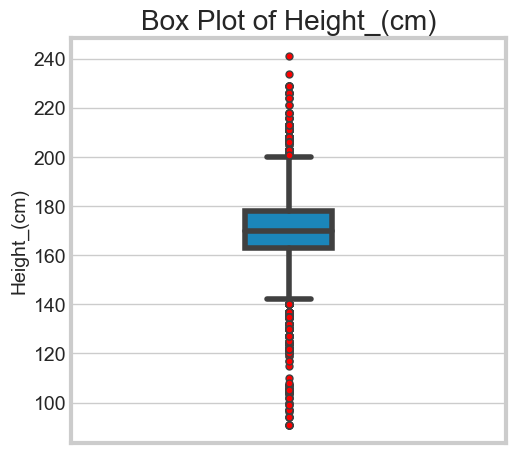

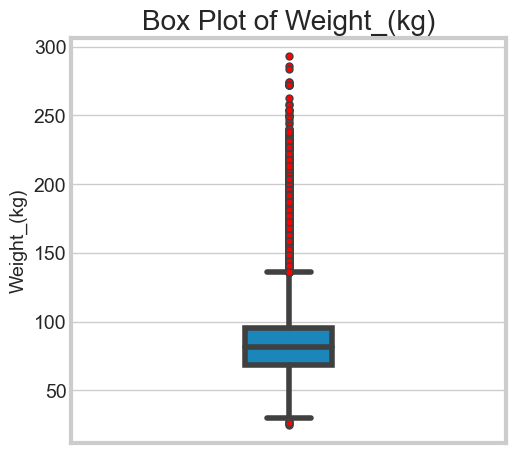

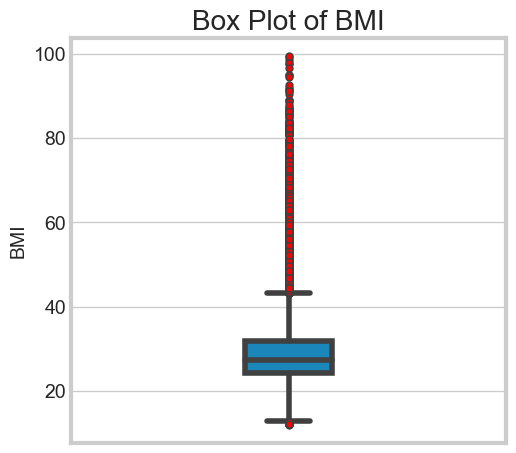

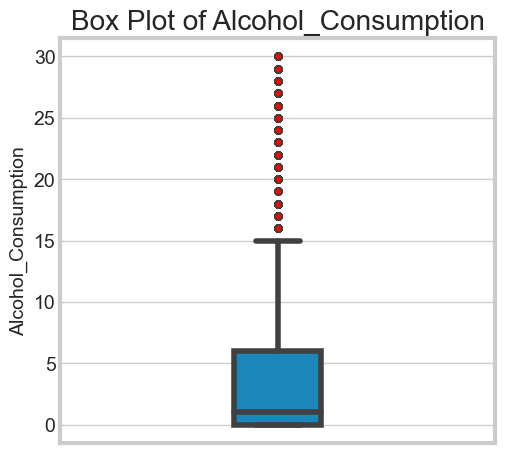

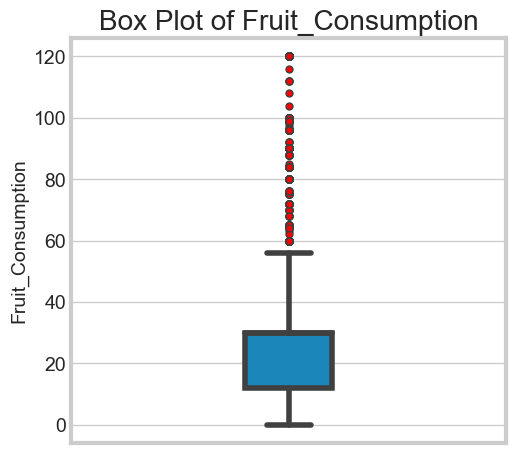

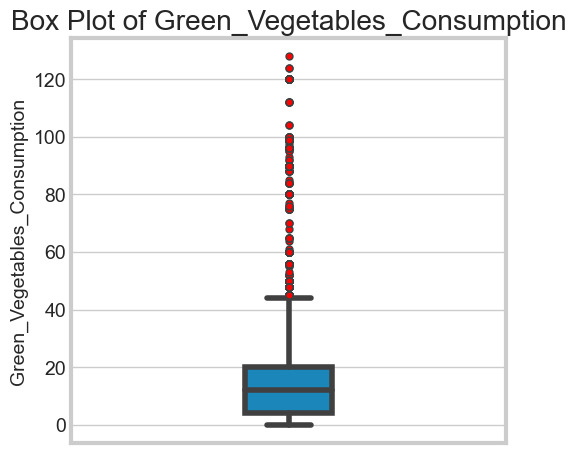

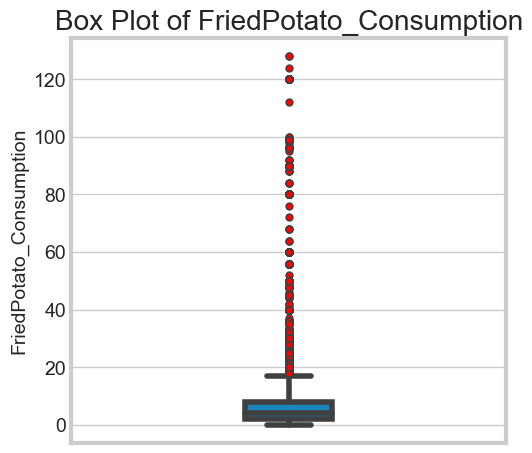

In [15]:
# Identify outliers or extreme cases: abnormally high or low values

numerical_variables = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

sns.set_style("whitegrid")
for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[variable], width = 0.2, fliersize=5, flierprops={'marker':'o', 'markerfacecolor':'red'})
    plt.title(variable.replace('_', ' '))
    plt.title('Box Plot of ' + variable)  


## - Insights: 
- Height: The majority of the data is clustered around the middle, suggesting an average height range for most individuals. There are outliers on both the lower and higher ends, representing particularly short and tall individuals, respectively. Most outliers range from approximately 90-140 cm & 200-240 cm.
- Weight: Outliers on the higher end represent individuals who weigh significantly more than the majority. Most outliers range from approximately 140-300 kg.
- BMI: there are numerous outliers on the higher end ranging from approximately 45-100.
- Alcohol Consumption: The main data cluster is towards the bottom, indicating that most individuals have a low alcohol consumption. Numerous outliers are present, representing individuals with significantly higher alcohol intake. Most outliers range from approximately 16-30.
- Fruit Consumption: Most outliers range from approximately 60-120.
- Green Vegetable Consumption: The majority of the data lies towards the lower end. Most outliers range from approximately 45-130.
- Fried Potato Consumption: The majority of the data (the box) is close to the lower end, indicating that most people consume fried potatoes at a relatively lower quantity. Most outliers range from approximately 18-130.

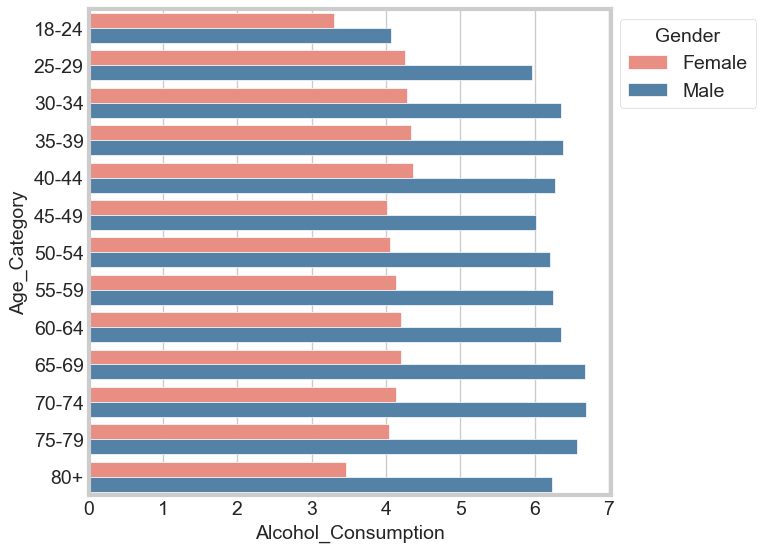

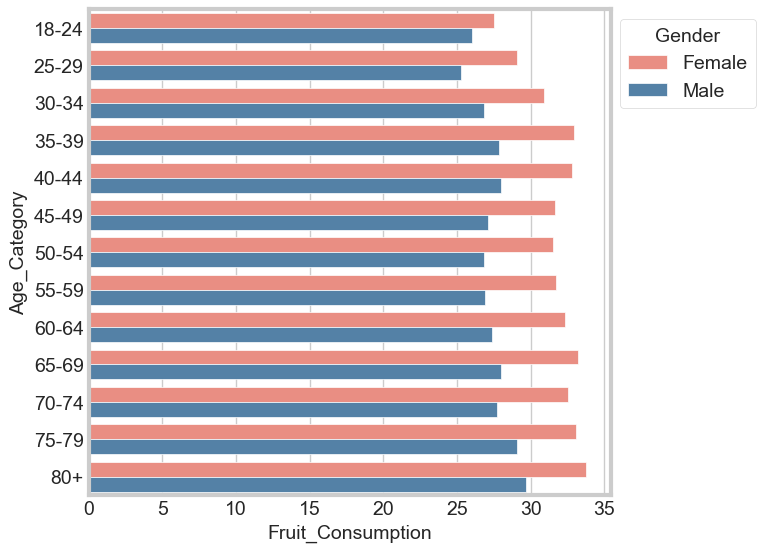

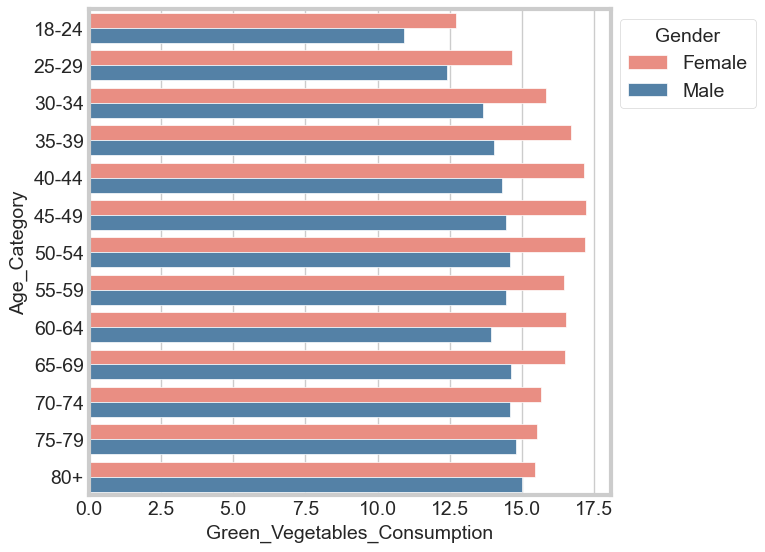

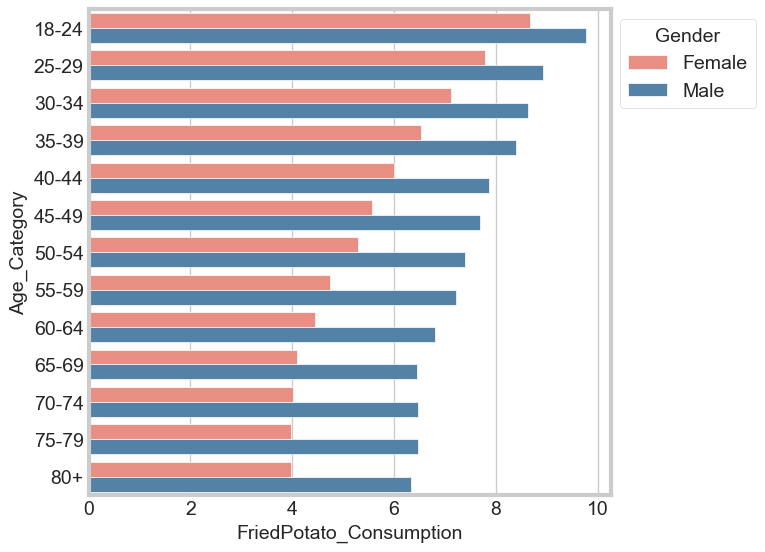

In [16]:
dietary_consumptions = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
   
colors = {
    'Male': 'steelblue',
    'Female': 'salmon'
}
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

for variable in dietary_consumptions:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, y='Age_Category', x=variable, order=age_order, hue='Sex', palette=colors,ci=None)
    plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

## - Insights:

- Overall, males tend to consume more alcohol than females across almost all age groups. The 18-24 age group for males shows a particularly higher consumption than their female counterparts. It's notable that alcohol consumption for females in the 18-24 age category is comparatively low.

- Fruit consumption is relatively high for both males and females across all age groups. The difference between male and female consumption for fruits is not as pronounced as in the other categories, although females in the 18-24 age group have a slightly higher consumption than males.

- Both genders across all age groups exhibit high consumption of green vegetables. Males in the age range of 18-24 show a distinctively lower consumption than their female counterparts in the same age range. Otherwise, consumption levels are fairly even across genders.

- Across all age groups, both males and females seem to have high consumption of fried potatoes. For most age categories, males appear to have slightly higher fried potato consumption than females.

- Bad Eating Habits: If we consider fried potato and alcohol consumption as indicative of "bad" eating habits:
Males, in general, have a higher propensity for these habits across most age groups. This is especially pronounced in the 18-24 age category for alcohol consumption.
- Good Eating Habits: Green vegetable and fruit consumption is generally high for both genders across all age groups, which is a positive sign.

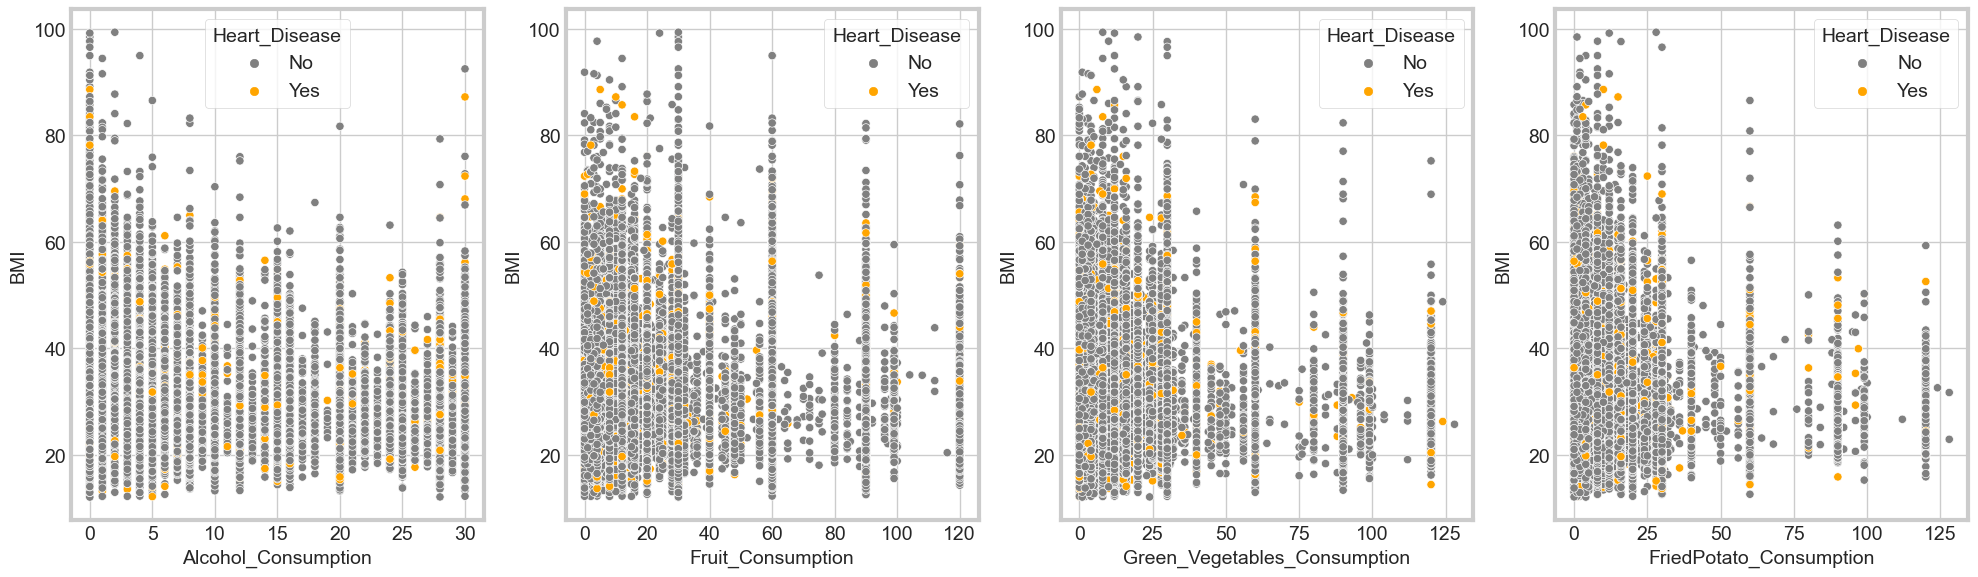

In [17]:
# Create subplots for each of the consumption choices:

plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
for i, variable in enumerate(dietary_consumptions, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df, x=variable, y="BMI", hue="Heart_Disease", palette=color_map)
    plt.subplots_adjust(wspace=0.5)
    plt.tight_layout()

## - Insights:

- Fried Potato Consumption:

There's a dense concentration of individuals across all BMI ranges who consume between 0-50 times. There's no clear trend showing higher Fried Potato consumption leading to more cases of heart disease.

- Green Vegetables Consumption:

Consumption is more spread out, with the majority consuming between 0-100 times. A higher number of heart disease cases appear to be concentrated in the lower to middle BMI ranges, irrespective of vegetable consumption.

- Fruit Consumption:

Majority consume between 0-75 times of fruit. Similar to Green Vegetables, heart disease prevalence doesn't show a distinct pattern with fruit consumption. Cases are spread across all BMI ranges.

- Alcohol Consumption:

The vast majority consume between 0-10 units of alcohol. There's a slight concentration of heart disease cases in the higher BMI range (> 80), but it doesn't provide a conclusive insight about the correlation between alcohol consumption and heart disease.

- Key Takeaways:

Higher fried potato consumption might be a concerning factor for heart disease when combined with a higher BMI.

Consuming green vegetables and fruits in moderate amounts might be associated with a lower prevalence of heart disease, but the data is not strongly conclusive.

A higher BMI is consistently associated with a higher prevalence of heart disease across different food consumptions.

## From those scatterplots, in addition to the barplots regarding age category & each of the dietary choices, males seem to have more bad eating/drinking habits than their female counterparts, which could be one of the reasons to why heart disease prevalence is higher in males than in females.

In [18]:
# Since there might be other factors influencing the prevalence of Heart Disease, we need to get a better analysis of the data 
# Notice there is 'No' and 'Yes' for most of the one-hot encoding categorical value, which need to change to 0 and 1

# Mapping for Diabetes
diabetes_map = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_map)

# Convert remaining categorical variables with "Yes" and "No" values to binary format
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
    
# One-hot encoding to seperate gender into two different columns
df = pd.get_dummies(df, columns=['Sex'])

# Ordinal encoding for General_Health, Checkup, Age_Category

general_health_map = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_map)

checkup_map = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
df['Checkup'] = df['Checkup'].map(checkup_map)


age_category_map = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_map)    
    

# Display the first few rows of the cleaned dataset
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


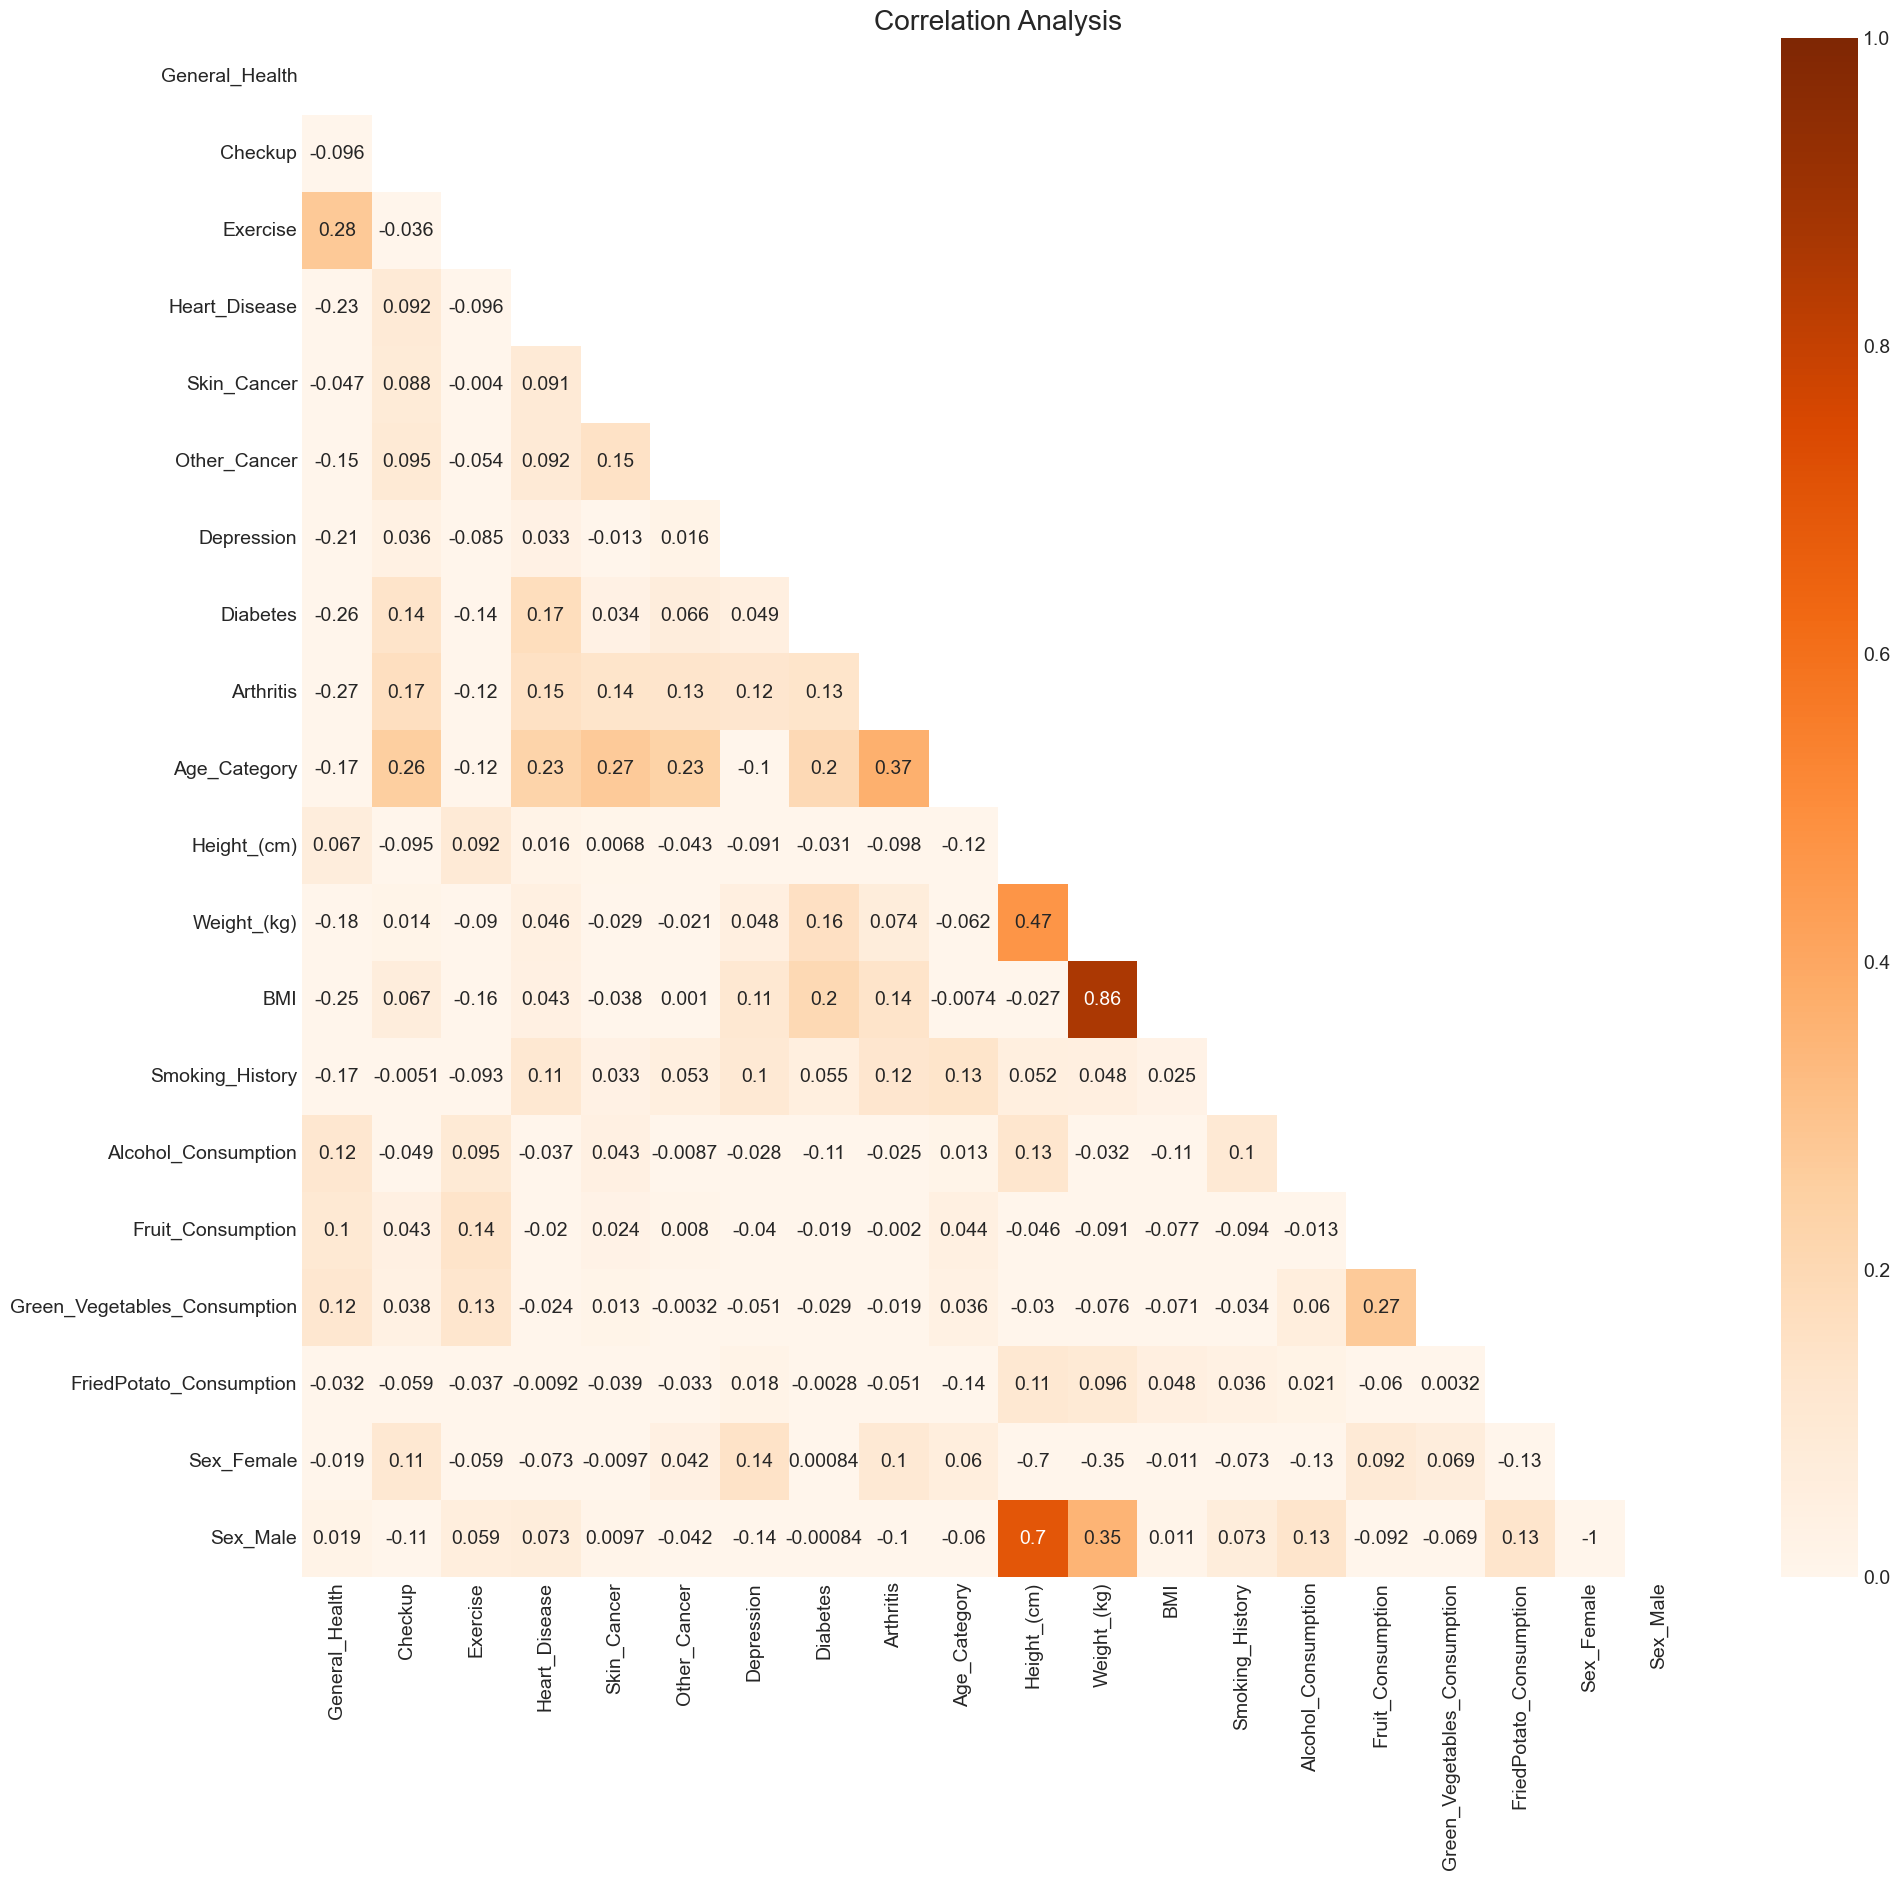

In [25]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(20, 19))
sns.heatmap(corr, mask=mask, cmap='Oranges', vmin=0, vmax=1, annot=True, ax=ax)
ax.set_title('Correlation Analysis')
ax.grid(False) 
plt.show()

## - Insights: 

- General_Health: Negative correlation (-0.23). As general health improves, the prevalence of heart disease seems to decrease. This suggests that individuals reporting better overall health are less likely to have heart disease.

- Exercise: Negative correlation (-0.096). Regular exercise seems to slightly decrease the prevalence of heart disease, indicating a protective effect, albeit a weak one.
- Arthritis: Positive correlation (0.13). Individuals with arthritis might have a slightly higher risk of heart disease.
- Age_Category: Positive correlation (0.23). Older individuals seem to be at a higher risk of heart disease, as is commonly expected.
- Weight_(kg): Positive correlation (0.18) and BMI: Positive correlation (0.25). Higher weight and BMI values are associated with an increased risk of heart disease. This implies that overweight or obese individuals might be more prone to heart disease.
- Smoking_History: Positive correlation (0.13). Smoking seems to be a risk factor for heart disease.
- Sex_Male: Positive correlation (0.11) and Sex_Female: Negative correlation (-0.11). Males seem to be slightly more at risk for heart disease compared to females.

Notable Insights:

Among the variables shown, BMI, Age_Category, and General_Health have the strongest correlations with heart disease. This suggests that age, body mass index, and overall health are significant factors influencing heart disease prevalence.

Lifestyle factors like Exercise and Smoking_History also play a role, but their correlations are weaker. Still, promoting regular exercise and discouraging smoking can be beneficial strategies.

It's worth noting that while Sex_Male and Sex_Female both correlate with heart disease, they are essentially two sides of the same coin (one-hot encoded) and indicate gender differences in heart disease prevalence.